In [1]:
#Standard imports plus setting the random seed to ensure reproducibility
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
np.random.seed(123)

1)A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

2)Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [11]:
print(np.percentile(np.random.normal(3,.3,10_000),95))
print(stats.norm(3,.3).isf(.05))

3.4979966744120357
3.4934560880854417


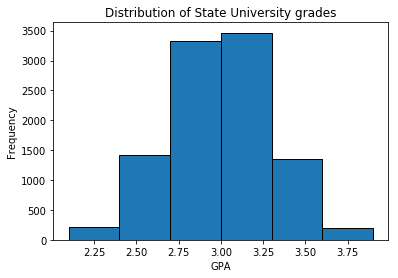

In [67]:

plt.hist(test,bins=[2.1,2.4,2.7,3,3.3,3.6,3.9],edgecolor='black')
plt.title('Distribution of State University grades')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

In [103]:
stats.poisson(.02*4326).sf(97)

0.12014004822363389

4)You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?

In [6]:
#probability of getting question right is 1% since there are 100 answer choices. Only dealing with first 60 questions
print((np.random.binomial(60, .01, 100_000)>=1).mean())
print(stats.binom(60,.01).sf(0))
print(1-stats.binom(60,.01).cdf(0))

0.45157
0.4528433576092388
0.4528433576092388


6)You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [5]:
#Convert the number of people in line to a number of minutes
avg_wait_time=2*15
std_wait_time=2*3
print((np.random.normal(avg_wait_time,std_wait_time,10_000)<=35).mean())
print(stats.norm(avg_wait_time,std_wait_time).cdf(35))

0.7927
0.7976716190363569


7)Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

a)What percent of employees earn less than 60,000?
b)What percent of employees earn more than 95,000?
c)What percent of employees earn between 65,000 and 80,000?
d)What do the top 5% of employees make?

In [74]:
#Connect to database
from env import host, user, password
import pandas as pd
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    return url

url=get_db_url()
salaries=pd.read_sql('''SELECT * FROM salaries WHERE to_date>NOW()''',url)

In [80]:
#Get average salary from data to use in normal distribution calculation
average_salary=np.round(np.mean(salaries.salary),2)
average_salary

72012.24

In [78]:
#Get standard deviation of salary to use in normal distribution calculation
std_salary=np.round(np.std(salaries.salary))
std_salary

17310.0

In [106]:
#Percent of employees that earn less than $60,000
print((salaries.salary<60_000).mean())
print((np.random.normal(average_salary,std_salary,100_000)<60_000).mean())
print(stats.norm(average_salary,std_salary).cdf(60_000))

0.270614349252886
0.24419
0.2438574078313278


In [104]:
#Percent of employees that earn more than $95,000
print((salaries.salary>95_000).mean())
print((np.random.normal(average_salary,std_salary,100_000)>95_000).mean())
print(stats.norm(average_salary,std_salary).sf(95_000))

0.1086272092752078
0.0919
0.09208829007127312


In [107]:
#Percent of employees that earn between $65,000 and $80,000
lt_80=(np.random.normal(average_salary,std_salary,100_000)<=80_000).mean()
lt_65=(np.random.normal(average_salary,std_salary,100_000)<=65_000).mean()
print((salaries.salary<=80_000).mean()-(salaries.salary<=65_000).mean())
print(lt_80-gt_65)
print(stats.norm(average_salary,std_salary).cdf(80_000)-stats.norm(average_salary,std_salary).cdf(65_000))

0.32511952158051677
0.33281999999999995
0.33506048676360467
